# Training an Image Classifier on the CIFAR-10 dataset

In [2]:
import torch 
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


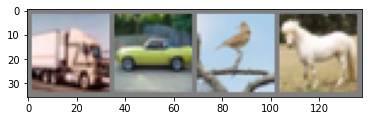

truck   car  bird horse


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.173
[1,  4000] loss: 1.816
[1,  6000] loss: 1.661
[1,  8000] loss: 1.561
[1, 10000] loss: 1.519
[1, 12000] loss: 1.488
[2,  2000] loss: 1.418
[2,  4000] loss: 1.393
[2,  6000] loss: 1.341
[2,  8000] loss: 1.332
[2, 10000] loss: 1.318
[2, 12000] loss: 1.296
Finished Training


In [12]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

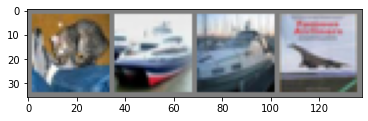

GroundTruth:    cat  ship  ship plane


In [15]:
dataiter= iter(testloader)
images, labels = dataiter.next()

# print images

imshow(torchvision.utils.make_grid(images))

print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [16]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [19]:
outputs = net(images)


omega


In [21]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [25]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 66 %
Accuracy of   car : 60 %
Accuracy of  bird : 28 %
Accuracy of   cat : 30 %
Accuracy of  deer : 52 %
Accuracy of   dog : 59 %
Accuracy of  frog : 59 %
Accuracy of horse : 66 %
Accuracy of  ship : 69 %
Accuracy of truck : 61 %


# Introduction to PyTorch and Numpy variables and Operations

In [4]:
from __future__ import print_function
import torch

In [5]:
x=torch.empty(5, 3)
print(x)

tensor([[5.2467e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 6.1657e-44],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 1.8984e-35]])


In [6]:
x=torch.rand(5, 3)
print(x)


tensor([[0.5124, 0.3926, 0.1180],
        [0.7822, 0.8638, 0.8415],
        [0.0186, 0.7411, 0.3859],
        [0.9937, 0.6146, 0.5988],
        [0.9089, 0.4499, 0.5449]])


In [7]:
x=torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [8]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [9]:
x=x.new_ones(5, 3, dtype=torch.double)
print(x)

x=torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.3961, -0.6821,  2.3091],
        [ 0.9145, -1.2092,  0.5901],
        [ 0.8808,  1.5372,  1.5032],
        [ 0.0564, -1.1279,  0.5734],
        [-0.8666,  1.2040,  3.1958]])


In [10]:
print(x.size())

torch.Size([5, 3])


In [11]:
y=torch.rand(5, 3)
print(x+y)


tensor([[ 0.1401, -0.6154,  2.5308],
        [ 1.0157, -0.2548,  0.7361],
        [ 1.1639,  2.3472,  2.3351],
        [ 0.2052, -0.7418,  1.2256],
        [ 0.1326,  2.1648,  3.4145]])


In [13]:
print(torch.add(x,y))

tensor([[ 0.1401, -0.6154,  2.5308],
        [ 1.0157, -0.2548,  0.7361],
        [ 1.1639,  2.3472,  2.3351],
        [ 0.2052, -0.7418,  1.2256],
        [ 0.1326,  2.1648,  3.4145]])


In [14]:
result=torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.1401, -0.6154,  2.5308],
        [ 1.0157, -0.2548,  0.7361],
        [ 1.1639,  2.3472,  2.3351],
        [ 0.2052, -0.7418,  1.2256],
        [ 0.1326,  2.1648,  3.4145]])


In [15]:
y.add_(x)
print(y)

tensor([[ 0.1401, -0.6154,  2.5308],
        [ 1.0157, -0.2548,  0.7361],
        [ 1.1639,  2.3472,  2.3351],
        [ 0.2052, -0.7418,  1.2256],
        [ 0.1326,  2.1648,  3.4145]])


In [16]:
print(x[:, 1])

tensor([-0.6821, -1.2092,  1.5372, -1.1279,  1.2040])


In [17]:
x = torch.randn(4, 4)
y=x.view(16)
z=x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [19]:
x=torch.randn(1)
print(x)
print(x.item())

tensor([-1.7721])
-1.7721376419067383


In [20]:
a=torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [21]:
b=a.numpy()
print(b)
print(a)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.])


In [22]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [23]:
import numpy as np
a=np.ones(5)
b=torch.from_numpy(a)

np.add(a, 1, out=a)

print(a)
print(b)


[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


# AutoGrad: Automatic Differenciation

In [24]:
import torch

In [26]:
x=torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [27]:
y=x+2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [28]:
print(y.grad_fn)

In [29]:
z=y*y*3
out= z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [30]:
a=torch.randn(2, 2)
a=((a*3)/(a-1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b=(a*a).sum()
print(b.grad_fn)

False
True


In [31]:
out.backward()

In [32]:
print(x.grad)


tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [34]:
x=torch.randn(3, requires_grad=True)

y=x*2
print(y.data) 
print(y.data.norm)
while y.data.norm()<1000:
  y=y*2

print(y)

tensor([ 3.5733, -0.1828,  0.6845])
<bound method Tensor.norm of tensor([ 3.5733, -0.1828,  0.6845])>
tensor([1829.5283,  -93.5963,  350.4556], grad_fn=<MulBackward0>)


In [36]:
v=torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)

y.backward(v)
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [40]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)


True
True
False


In [41]:
print(x.requires_grad)
y=x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


# Neural Networks

In [42]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [43]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [56]:
params=list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [47]:
input = torch.randn(1, 1, 32, 32)
out= net(input)
print(out)

tensor([[-0.0252, -0.0274,  0.0073, -0.0679,  0.0877, -0.0032, -0.0083,  0.1029,
          0.0561, -0.0015]], grad_fn=<AddmmBackward>)


In [48]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [50]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.9733, grad_fn=<MseLossBackward>)


In [53]:
print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLU


((<AddmmBackward object at 0x7f067f2d30f0>, 0),)


In [54]:
net.zero_grad() # zeros the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0083,  0.0070,  0.0119, -0.0015, -0.0023, -0.0030])


In [57]:
learning_rate =0.01

for f in net.parameters():
  f.data.sub_(f.grad.data * learning_rate)

In [59]:
import torch.optim as optim

# create your optimizer

optimizer = optim.SGD(net.parameters(), lr=0.01)

#in your training loop:
optimizer.zero_grad() # zero the gradient buffers
output=net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # Does the update
